In [1]:
%tensorflow_version 2.x

# 資料預處理

In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
import tensorflow.keras.utils as np_utils
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist 
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train=x_train_image.reshape(-1,784).astype('float32')
x_test=x_test_image.reshape(-1,784).astype('float32')

In [6]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [7]:
y_train_onehot = np_utils.to_categorical(y_train_label)
y_test_onehot = np_utils.to_categorical(y_test_label)

In [8]:
print('Train feature:',x_train_normalize.shape)
print('Train label:',y_train_onehot.shape)

Train feature: (60000, 784)
Train label: (60000, 10)


In [9]:
print('Test feature:',x_test_normalize.shape)
print('Test label:',y_test_onehot.shape)

Test feature: (10000, 784)
Test label: (10000, 10)


# 建立模型

In [10]:
from tensorflow.keras.layers import Dense 

In [11]:
class MLP_Model(tf.keras.Model):
  def __init__(self):
    super(MLP_Model, self).__init__(name='MLP')
    self.h1_layer=Dense(256,activation='relu') 
    self.out_layer=Dense(10,activation='softmax')

  def call(self, inputs):
    h1=self.h1_layer(inputs)
    y_predict=self.out_layer(h1)
    return y_predict


In [12]:
model = MLP_Model()

In [13]:
model.build(input_shape=(None, 784))

#查看模型摘要

In [14]:
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               multiple                  200960    
                                                                 
 dense_1 (Dense)             multiple                  2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.call(tf.keras.layers.Input(shape=(784)))

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>

In [16]:
model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


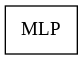

In [17]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

# 訓練模型

In [18]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

In [19]:
train_history=model.fit(x=x_train_normalize,y=y_train_onehot,
       validation_split=0.2,batch_size=200,epochs=10,verbose=2)

Epoch 1/10
240/240 - 4s - loss: 0.3838 - acc: 0.8954 - val_loss: 0.2033 - val_acc: 0.9454 - 4s/epoch - 17ms/step
Epoch 2/10
240/240 - 3s - loss: 0.1746 - acc: 0.9512 - val_loss: 0.1462 - val_acc: 0.9597 - 3s/epoch - 11ms/step
Epoch 3/10
240/240 - 3s - loss: 0.1222 - acc: 0.9661 - val_loss: 0.1218 - val_acc: 0.9632 - 3s/epoch - 10ms/step
Epoch 4/10
240/240 - 3s - loss: 0.0928 - acc: 0.9736 - val_loss: 0.1054 - val_acc: 0.9705 - 3s/epoch - 11ms/step
Epoch 5/10
240/240 - 3s - loss: 0.0726 - acc: 0.9800 - val_loss: 0.0993 - val_acc: 0.9680 - 3s/epoch - 12ms/step
Epoch 6/10
240/240 - 2s - loss: 0.0590 - acc: 0.9837 - val_loss: 0.0883 - val_acc: 0.9730 - 2s/epoch - 10ms/step
Epoch 7/10
240/240 - 3s - loss: 0.0485 - acc: 0.9868 - val_loss: 0.0895 - val_acc: 0.9724 - 3s/epoch - 10ms/step
Epoch 8/10
240/240 - 3s - loss: 0.0389 - acc: 0.9897 - val_loss: 0.0816 - val_acc: 0.9753 - 3s/epoch - 10ms/step
Epoch 9/10
240/240 - 2s - loss: 0.0335 - acc: 0.9913 - val_loss: 0.0842 - val_acc: 0.9752 - 2s/e

# 以圖形顯示訓練過程

In [20]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

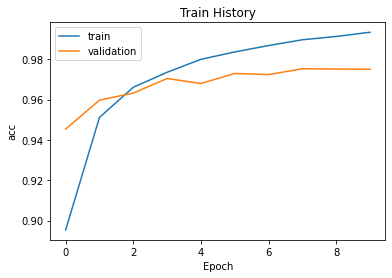

In [21]:
show_train_history(train_history,'acc','val_acc')

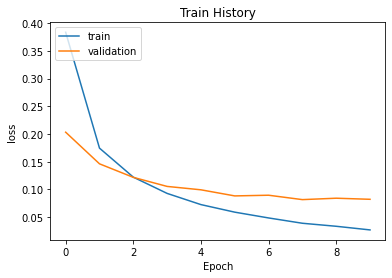

In [22]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [23]:
scores=model.evaluate(x_test_normalize,y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.0692 - acc: 0.9792 - 690ms/epoch - 2ms/step


In [24]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.06921312212944031 test_acc= 0.979200005531311


# 進行預測

不建議使用model.predict_classes

In [25]:
#prediction=  model.predict_classes(x_test_normalize)

建議使用model.predict +tf.argmax 取代

In [26]:
probability = model.predict(x_test_normalize)

In [27]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [28]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

model.predict(x)詳細介紹

In [29]:
probability = model.predict(x_test_normalize)

In [30]:
probability.shape

(10000, 10)

In [31]:
probability [:2]

array([[7.0515306e-08, 7.7174844e-09, 1.9184295e-06, 8.4876269e-04,
        9.5952524e-11, 9.9206083e-08, 1.8031550e-12, 9.9912459e-01,
        1.4213035e-06, 2.3062808e-05],
       [2.1212831e-08, 7.9052820e-04, 9.9920648e-01, 1.6734914e-06,
        1.0086393e-14, 2.4901047e-07, 1.5554231e-07, 8.5087840e-12,
        9.8886767e-07, 1.4525529e-12]], dtype=float32)

tf.argmax詳細介紹

In [32]:
probability[0]

array([7.0515306e-08, 7.7174844e-09, 1.9184295e-06, 8.4876269e-04,
       9.5952524e-11, 9.9206083e-08, 1.8031550e-12, 9.9912459e-01,
       1.4213035e-06, 2.3062808e-05], dtype=float32)

In [33]:
prediction=tf.argmax(probability, axis=-1).numpy()

In [34]:
prediction[0]

7

#predict_class_probability

In [35]:
def predict_class_probability(model, x_feature):
  probability = model.predict(x_feature)
  prediction=tf.argmax(probability, axis=-1).numpy() 
  return prediction,probability

In [36]:
prediction,probability=predict_class_probability(model,x_test_normalize)

In [37]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

In [38]:
probability[0]

array([7.0515306e-08, 7.7174844e-09, 1.9184295e-06, 8.4876269e-04,
       9.5952524e-11, 9.9206083e-08, 1.8031550e-12, 9.9912459e-01,
       1.4213035e-06, 2.3062808e-05], dtype=float32)

#顯示機率

In [39]:
  for i in range(10):
    print(i,' Probability:%.9f'%(probability[0][i])) 

0  Probability:0.000000071
1  Probability:0.000000008
2  Probability:0.000001918
3  Probability:0.000848763
4  Probability:0.000000000
5  Probability:0.000000099
6  Probability:0.000000000
7  Probability:0.999124587
8  Probability:0.000001421
9  Probability:0.000023063


In [40]:
def show_predicted_probability(images,labels,
     prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary')
  plt.show()
  if len(labels)>0:print('label:',labels[idx])
  if len(labels)>0:print('predict:',prediction[idx])
  for i in range(10):
    print(i,' Probability:%.9f'%(probability[idx][i])) 

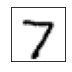

label: 7
predict: 7
0  Probability:0.000000071
1  Probability:0.000000008
2  Probability:0.000001918
3  Probability:0.000848763
4  Probability:0.000000000
5  Probability:0.000000099
6  Probability:0.000000000
7  Probability:0.999124587
8  Probability:0.000001421
9  Probability:0.000023063


In [41]:
show_predicted_probability(x_test_image,y_test_label,
              prediction,probability,0)

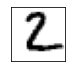

label: 2
predict: 2
0  Probability:0.000000021
1  Probability:0.000790528
2  Probability:0.999206483
3  Probability:0.000001673
4  Probability:0.000000000
5  Probability:0.000000249
6  Probability:0.000000156
7  Probability:0.000000000
8  Probability:0.000000989
9  Probability:0.000000000


In [42]:
show_predicted_probability(x_test_image,y_test_label,
             prediction,probability,1)

In [43]:
prediction=tf.argmax(probability, axis=1).numpy()

In [44]:
prediction[0]

7

In [45]:
prediction=tf.argmax(model.predict(x_test_normalize), axis=-1).numpy()

In [46]:
prediction 

array([7, 2, 1, ..., 4, 5, 6])

#顯示預測結果

In [47]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

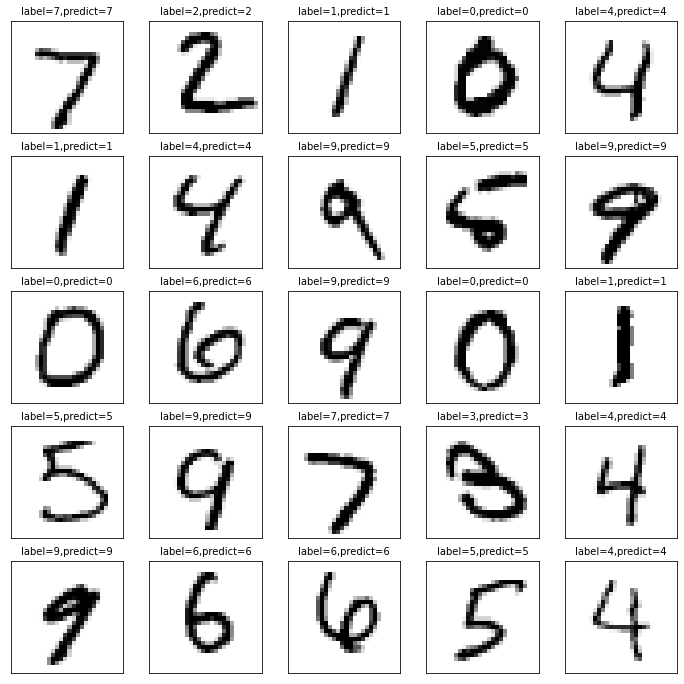

In [48]:
plot_images_labels_prediction(x_test_image,y_test_label,
               prediction,idx=0,num=25)

# confusion matrix

In [49]:
import pandas as pd

In [50]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [51]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,967,1,1,0,3,1,4,1,1,1
1,0,1126,4,0,0,1,2,0,2,0
2,4,1,1009,1,1,1,2,10,3,0
3,0,0,2,985,0,5,1,6,5,6
4,0,0,3,0,961,0,4,1,0,13
5,1,0,0,3,1,876,6,1,3,1
6,4,4,0,1,1,4,944,0,0,0
7,0,5,9,2,1,1,0,1005,1,4
8,3,0,2,7,6,5,5,4,938,4


# 查看預測錯誤資料

In [52]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [53]:
df[:5]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [54]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1393,5,3
2597,5,3


# 查看預測錯誤資料

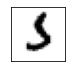

label: 5
predict: 3
0  Probability:0.000000539
1  Probability:0.007340222
2  Probability:0.000000325
3  Probability:0.792600751
4  Probability:0.000000101
5  Probability:0.199944317
6  Probability:0.000053214
7  Probability:0.000000238
8  Probability:0.000055058
9  Probability:0.000005254


In [55]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,340)

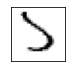

label: 5
predict: 3
0  Probability:0.000063639
1  Probability:0.004536862
2  Probability:0.000789568
3  Probability:0.966838837
4  Probability:0.000003638
5  Probability:0.020001512
6  Probability:0.001696490
7  Probability:0.005011705
8  Probability:0.000389106
9  Probability:0.000668609


In [56]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1393)